### Tools for taking seasonal means and averaging reanalysis temperature proiles

In [101]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from glob import glob
from scipy.interpolate import interp1d, interp2d
from scipy.ndimage.filters import gaussian_filter1d
import pandas as pd
import calendar 
from matplotlib.font_manager import FontProperties
from scipy.interpolate import CubicSpline, BSpline

%run simulate_radiances_utils.py



In [99]:
save_final_figs_dir = '/home/cchristo/proj_christian/final_results/figs/'



In [86]:
path_to_reananlysis_profiles = '/net/fluo/data2/groupMembers/cchristo/profiles/summit_merra/summit_all.nc'
path_to_cloud_mask = '/net/fluo/data2/groupMembers/cchristo/misc_data/cloud_bool_rad_29.nc'


ds = xr.open_dataset(path_to_reananlysis_profiles)


cloud_mask_ds = xr.open_dataset(path_to_cloud_mask)
cloud_free_ds = cloud_mask_ds.where(cloud_mask_ds['cloud_free_bool'] == 1, drop = True)

ds = ds.sel(time = cloud_free_ds.time)

In [50]:
## get clear-sky only 
# ds

In [87]:
ds_seasonal = ds.groupby('time.season').mean(dim = 'time', skipna = True)
ds_annual = ds.mean(dim = 'time', skipna = True)

In [28]:
# ds_annual['T'].plot()
# ds_annual



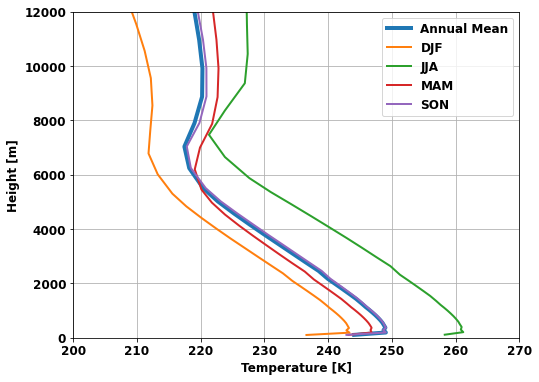

In [106]:

# p_prof = ds_annual['PL'].values
# T_prof = ds_annual['T'].values

p_prof, T_prof, dz_prof,  _,_,_,_ = compute_profile_properties_merra2(ds_annual,
                                                                      verbose = False)
z_prof = np.cumsum(dz_prof[::-1])
T_prof_incr = T_prof[::-1]
                                                                      
plot_profile(z_prof, T_prof_incr,    
             v_coord_type='height',
#              v_coord_type = 'pressure',
             newfig_bool = True, 
             min_pres = 3e2, 
             linewidth = 4,
             figsize = (8,6),
#              xlim = [1e-4, 1],
             xlabel = 'Temperature [K]',
             label = 'Annual Mean')

for seas_i in range(4):
    seas_ii = ds_seasonal.season.values[seas_i]
#     p_prof = ds_seasonal['PL'].sel(season = seas_ii).values
#     T_prof = ds_seasonal['T'].sel(season = seas_ii).values
    p_prof, T_prof, dz_prof,  _,_,_,_ = compute_profile_properties_merra2(ds_seasonal.sel(season = seas_ii), verbose = False)
    z_prof = np.cumsum(dz_prof[::-1])
    T_prof_incr = T_prof[::-1]
                                                                      
    plot_profile(z_prof, T_prof_incr, 
             v_coord_type='height',
             newfig_bool = False, 
              linewidth = 2,
#              xlim = [1e-4, 1],
             xlabel =  'Temperature [K]',
             label = seas_ii)
plt.ylim([0, 12000])
plt.xlim([200, 270])
plt.legend()
plt.savefig(save_final_figs_dir + 'mean_and_seasonal_temperature_profiles_merra.png', dpi = 300)

In [98]:
ds_annual['T'][::-1].values

array([244.07202, 249.04489, 248.68848, 248.97595, 248.74176, 248.50388,
       248.175  , 247.79335, 247.37125, 246.90909, 246.4116 , 245.87862,
       245.22112, 244.34384, 243.31862, 242.2374 , 241.11559, 239.95164,
       238.50063, 236.51497, 234.48425, 232.33446, 230.062  , 227.69511,
       225.22604, 222.69365, 220.4243 , 218.21255, 217.45345, 219.03899,
       220.2306 , 220.2866 , 219.77257, 219.03023, 218.211  , 217.49623,
       216.74054, 216.00557, 215.3326 , 214.784  , 214.23326, 214.08438,
       214.06004, 214.24144, 215.01431, 215.72516, 217.15158, 218.7339 ,
       220.7464 , 223.9779 , 226.52158, 229.86327, 232.92223, 236.34671,
       240.9091 , 245.8138 , 250.40376, 254.91263, 257.26648, 258.8512 ,
       256.8165 , 254.25006, 252.02641, 249.98265, 249.37009, 245.70676,
       238.15163, 231.91743, 226.50603, 220.26767, 211.74013, 202.80032],
      dtype=float32)

In [91]:
ds_annual['T'][-1]

<xarray.DataArray 'T' ()>
array(244.07202, dtype=float32)
Coordinates:
    lev      float64 72.0
    lat      float64 72.5
    lon      float64 -38.75